# 2. ANÁLISE DE SENTIMENTOS USANDO API "TEXTBLOB" 

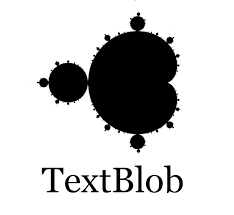

#Conhecendo a TextBlob

Segundo a documentação, a TextBlob é uma biblioteca Python voltada para o processamento de dados textuais, o principal objeto de estudo do NLP. Além disso, ela tem a missão de simplificar alguns processos importantes, usando - por baixo dos panos - as bibliotecas NLTK.
Vale ressaltar que, ao contrário de ferramentas como a NLTK, a TextBlob só possui suporte para a língua inglesa (desafio). 

#link documentação
https://textblob.readthedocs.io/en/dev/

In [13]:
#instalando a API
!pip install -U textblob
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


#Antes de usar algumas funções dessa biblioteca, será necessário importar e instalar alguns pacotes que pertencem à NLTK.

In [14]:
#Vamos importar a NLTK e baixar os pacotes necessários.
import nltk
nltk.download('movie_reviews')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to C:\Users\Samara Viana
[nltk_data]     Costa\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Samara Viana
[nltk_data]     Costa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Samara Viana
[nltk_data]     Costa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to C:\Users\Samara Viana
[nltk_data]     Costa\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Samara Viana
[nltk_data]     Costa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2.1. DOMINANDO O BÁSICO DO TEXTBLOB

# 2.1.1. Tokenização

Ao criar um objeto, podemos fazer a decomposição do texto que é extremamente importante em NLP. Esse processo de decomposição também é conhecido como tokenização. Existem diversas formas de tokenizar um texto como retirar pontuação e palavras que não são tão importantes. 

In [15]:
#"Brazil is an amazing country! I love bossa nova"
#"O Brasil é um país incrível! Eu amo a bossa nova"

import textblob
blob = textblob.TextBlob("Brazil is an amazing country! I love bossa nova.")

In [16]:
#Partindo do objeto TextBlob, podemos extrair as sentenças do texto usando o comando
blob.sentences

[Sentence("Brazil is an amazing country!"), Sentence("I love bossa nova.")]

In [17]:
#Além disso, é possível quebrar o texto em palavras
#Que retorna um objeto WordList contendo todas as palavras do texto sem pontuação
blob.words

WordList(['Brazil', 'is', 'an', 'amazing', 'country', 'I', 'love', 'bossa', 'nova'])

#Uma outra função que o objeto TextBlob nos oferece é a de extração de frases nominais. Estas apresentam mais de uma palavra, mas com um sentido único. Um bom exemplo disso é o termo Fake News que é composto de duas palavras, mas tem um significado específico.
Identificar esses termos pode ser um pouco complicado quando estamos trabalhando PNL, mas a TextBlob faz de uma maneira muito simples.

In [5]:
#Identificando frases nomianis 
#Podemos tratar 'bossa nova' como uma construção única e não perder o sentido da frase.
blob.noun_phrases

WordList(['brazil', 'amazing country', 'bossa nova'])

# 2.2.2. CLASSIFICAÇÃO

Dos desafios clássicos, quando lidamos com problemas de NLP, dois deles têm destaque na TextBlob: a classificação de palavras e a lematização.

A classificação de palavras nos ajuda a entender a morfologia dos elementos de uma frase, sejam eles substantivos, artigos, etc. Essa classificação pode facilitar, por exemplo, a compreensão de quais são os temas do texto a partir da avaliação dos substantivos.

In [18]:
#Para realizar a classificação, basta acessar o atributo tags do nosso objeto TextBlob
blob.tags

[('Brazil', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('amazing', 'JJ'),
 ('country', 'NN'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('bossa', 'JJ'),
 ('nova', 'NN')]

#NNP, que é a tag da palavra Brazil, refere-se a um substantivo próprio no singular, enquanto JJ está relacionado ao adjetivo...

# 2.2.3. Lematização

A lematização. De maneira geral, ela reduz uma palavra à sua base, retirando flexões, prefixos e sufixos. 

Para exemplificar o trabalho com a lematização na Textblob, vamos usar a frase "The documents are under the tables", Vamos usar a função lemmatize() em cada uma das palavras na nossa frase:

In [7]:
exemplo = textblob.TextBlob("The documents are under the tables")

In [8]:
lemmatized = [word.lemmatize() for word in exemplo.words]

In [19]:
#Que vai retornar uma lista de palavras lematizadas
lemmatized 

['The', 'document', 'are', 'under', 'the', 'table']

Percebam que as palavras que antes estavam no plural agora estão sem flexão.

# 2.2.4. Análise de sentimentos

Existem diversos métodos para fazer análise de sentimentos, avaliando se a frases denotam sentimentos negativos ou positivos. 

Para isso, basta acessar o atributo 'sentiment' do objeto TextBlob. Esse atributo retorna um objeto 'Sentiment' que possui 2 valores. O primeiro refere-se à polaridade da frase, que vai desde a mais negativa (-1) à mais positiva (1). Já o segundo valor está relacionado à subjetividade/objetividade da frase. Esse valor varia de 0 a 1 e quanto mais próximo de 1, mais subjetiva é a frase.

Exemplo possitivo:

In [22]:
#realizando analise de sentimentos via API
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#criar um objeto blob que recebe, como parâmetro, o texto com o qual vamos trabalhar. 
#Probabilidade (polaridades)
blob = TextBlob("Brazil is an amazing country! I love bossa nova", analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.9321980125152954, p_neg=0.06780198748470621)

In [23]:
#Probabilidade (polaridades) e subjetividade
blob = TextBlob("Brazil is an amazing country! I love bossa nova")
blob.sentiment

Sentiment(polarity=0.625, subjectivity=0.75)

Exemplo negativo:

In [24]:
textblob.TextBlob('My experience in Brazil was terrible').sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

Essa frase apresenta uma conotação negativa e uma alta subjetividade.

# 2.2. CONCLUSÃO:

1. Essa forma de análise de sentimentos é do tipo não-supervisionada, o que significa que não precisamos passar uma base de frases positivas e negativas para fazer a classificação, sendo uma ferramenta bastante poderosa e de fácil uso.

2. A biblioteca oferece simplicidade e eficiência em alguns processos caros relacionados ao processamento de linguagem natural. É especialmente recomendada a quem está iniciando na área, a quem busca funções pontuais e pode "quebrar o galho" em projetos de pequeno porte.

FIM!